In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>


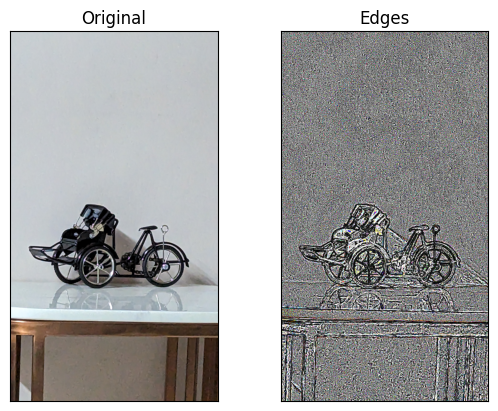

In [ ]:
def high_pass_filter(imgpath):

  img = cv2.imread(imgpath, 1)
  print(type(img))
  cv2.resize(img, dsize=(180, 180))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  edges = cv2.Laplacian(img, -1, ksize = 17,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
  output = [img, edges]
  titles = ['Original', 'Edges']

  return output,titles


def display_images(output,titles):
  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(output[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
  plt.show()

imgpath = "/content/drive/MyDrive/modelss/PXL_20230626_150435549.jpg"
output1,titles1 = high_pass_filter(imgpath)
display_images(output1,titles1)



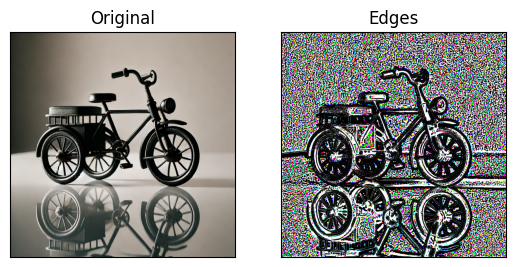

In [ ]:
def high_pass_filter(imgpath):

  img = cv2.imread(imgpath, 1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  edges = cv2.Laplacian(img, -1, ksize = 17,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
  output = [img, edges]
  titles = ['Original', 'Edges']

  return output,titles


def display_images(output,titles):
  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(output[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
  plt.show()

imgpath = "/content/drive/MyDrive/modelss/okai.webp"
output2,titles2 = high_pass_filter(imgpath)
display_images(output2,titles2)

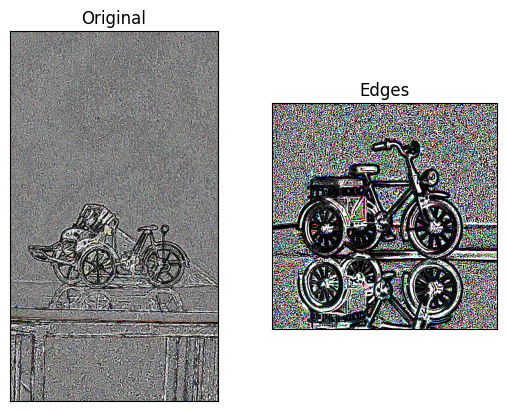

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(output1[1],cmap = 'gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(output2[1], cmap = 'gray')
plt.title('Edges')
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
# def canny(imgpath):

#   img = cv2.imread(imgpath, 1)
#   # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   # edges = cv2.Laplacian(img, -1, ksize = 17,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
#   # output = [img, edges]
#   # titles = ['Original', 'Edges']

#   L1 = cv2.Canny(img, 50, 300, L2gradient = False)
#   L2 = cv2.Canny(img, 100, 150, L2gradient = True)
#   titles = ['Original', 'L1 Norm', 'L2 Norm']
#   output = [img, L1, L2]

#   return output,titles


# def display_images(output,titles):
#   for i in range(3):
#     plt.subplot(1, 3, i+1)
#     plt.imshow(output[i], cmap = 'gray')
#     plt.title(titles[i])
#     plt.xticks([])
#     plt.yticks([])
#   plt.figure(figsize=(40,40))
#   plt.show()

# imgpath = "/content/drive/MyDrive/images for ai vs human project/ONEPLUS 9R/IMG_20230625_144452.jpg"
# output2,titles2 = canny(imgpath)
# display_images(output2,titles2)

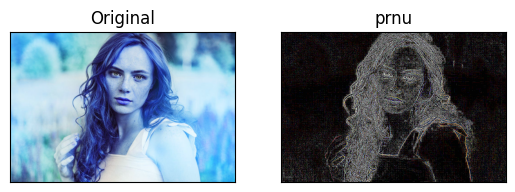

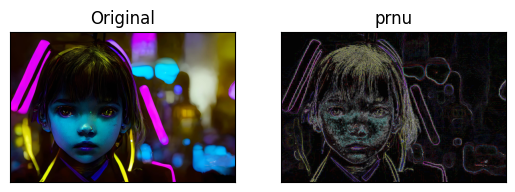

In [ ]:
import cv2
import numpy as np
from scipy import ndimage

def extract_prnu(image_path):
    # Step 1: Read the image
    img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)  # Grayscale for simplicity
    if img is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")

    # Step 2: Denoise the image using a Gaussian or wavelet denoising method
    # Here we use Gaussian filtering to smooth and then subtract from original
    denoised_img = cv2.GaussianBlur(img, (3, 3), 0)

    # Step 3: Extract the noise (PRNU pattern) by subtracting the denoised image from the original image
    noise = img.astype(np.float32) - denoised_img.astype(np.float32)

    # Step 4: Normalize the noise for better visualization/processing
    noise_mean = np.mean(noise)
    noise_std = np.std(noise)
    prnu_noise = (noise - noise_mean) / noise_std  # Normalize to zero-mean and unit variance

    output = [img, prnu_noise]
    titles = ['Original', 'prnu']

    return output, titles


# Example Usage
image_path = "/content/drive/MyDrive/Project/ai-vs-real-images/Captured-Image/1-shutterstock_588634790.jpg"

# Extract PRNU
output, titles = extract_prnu(image_path)

display_images(output, titles)

image_path = "/content/drive/MyDrive/Project/ai-vs-real-images/AI-Generated/082922_GeneratedArtAI_02_teh_z1b_04.jpg"

output, titles = extract_prnu(image_path)

display_images(output, titles)


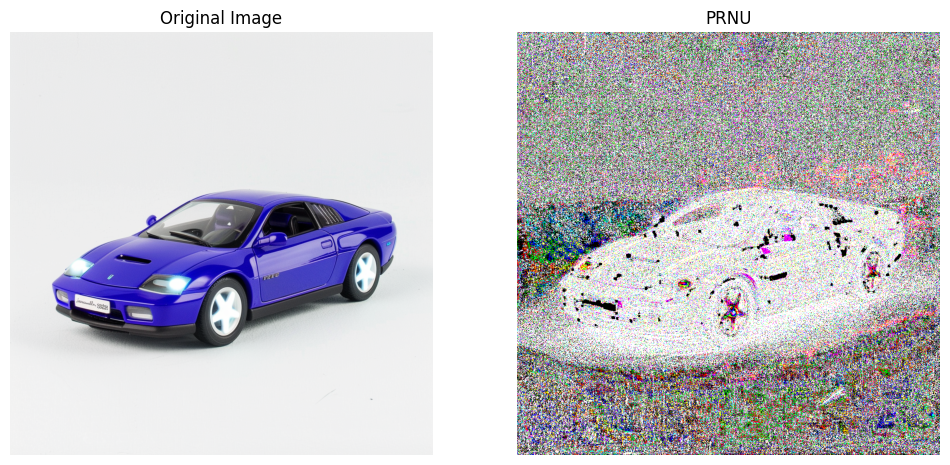

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2

def get_prnu(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.COLOR_BGR2RGB) # cv2.IMREAD_GRAYSCALE

    # Apply wavelet denoising
    denoised_img = cv2.fastNlMeansDenoising(img, h=10, templateWindowSize=7, searchWindowSize=21)

    # Convert images to frequency domain
    img_freq = fft2(img)
    denoised_img_freq = fft2(denoised_img)

    # Subtract denoised image from original image
    noise_freq = img_freq - denoised_img_freq

    # Convert back to spatial domain
    prnu = np.abs(ifft2(noise_freq))

    return img, prnu

# Example usage
original_img, prnu = get_prnu("/content/drive/MyDrive/images for ai vs human project/Compressed images/ff.png")

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('PRNU')
plt.imshow(prnu, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
import cv2
import numpy as np
from scipy import ndimage

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Dataset/Train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  shuffle=True,
  batch_size = batch_size
)

Found 1281 files belonging to 2 classes.
Using 1025 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['AI Generated', 'Captured']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
def apply_laplacian_rgb(images):
    # Convert TensorFlow tensor to a NumPy array
    images = images.numpy()  # Shape will be (batch_size, img_height, img_width, 3)

    # Initialize an empty array to store the processed images
    laplacian_images = np.zeros(images.shape, dtype=np.uint8)  # Maintain the same shape

    for i in range(images.shape[0]):  # Iterate through each image in the batch
        # Convert each image from BGR to RGB
        image_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

        # Apply Laplacian filter with kernel size = 17
        edges = cv2.Laplacian(image_rgb, cv2.CV_64F, ksize=17, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)


        # Store the processed image in the output array
        laplacian_images[i] = edges.astype(np.uint8)  # Convert back to uint8

    return laplacian_images  # Return the filtered batch of images

# TensorFlow wrapper for the Laplacian filter
def laplacian_preprocessing(images, labels):
    laplacian_images = tf.py_function(apply_laplacian_rgb, [images], tf.uint8)

    laplacian_images.set_shape([None, img_height, img_width, 3])

    return laplacian_images, labels

for i in range(28):
  train_ds


<ipython-input-43-84be8a3c1335>:17: RuntimeWarning: invalid value encountered in cast
  laplacian_images[i] = edges.astype(np.uint8)  # Convert back to uint8


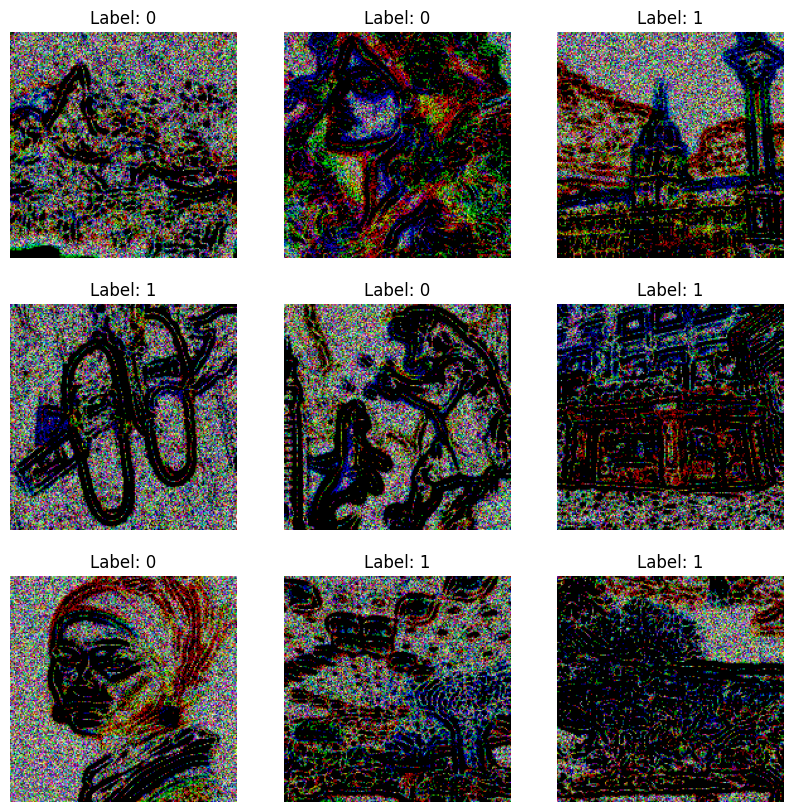

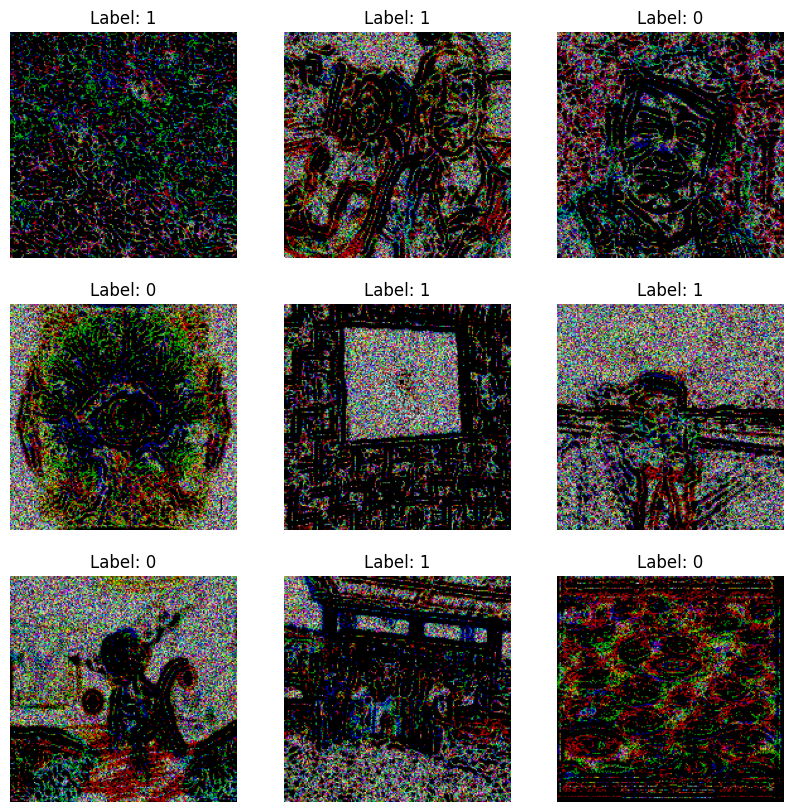

In [ ]:
for images, labels in train_ds.take(2):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())  # Convert to NumPy array for visualization
        plt.title(f"Label: {int(labels[i])}")
        plt.axis("off")
    plt.show()

In [ ]:
# ds = train_ds.map(lambda image, label: tf.py_function(high_pass_filter, [image, label], [tf.float32, tf.int64]))

In [ ]:
type(train_ds)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
def high_pass_filter(image,label):

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  edges = cv2.Laplacian(image, -1, ksize = 17,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
  # output = [image, edges]
  # titles = ['Original', 'Edges']

  return edges,label

In [ ]:
# import tensorflow as tf
# import cv2
# import matplotlib.pyplot as plt

# def high_pass_filter(image, label):
#     print(type(image))
#     image = image.numpy()
#     plt.imshow(image)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     edges = cv2.Laplacian(image, -1, ksize=17, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
#     return edges, label

# def apply_filter_to_dataset(train_ds):
#     filtered_images = []
#     labels = []
#     for images, labels in train_ds:
#       for image in images:
#         filtered_image, label = high_pass_filter(image, label)
#         filtered_images.append(filtered_image)
#         labels.append(label)
#     return filtered_images, labels

# # Example usage:
# # Assuming 'train_ds' is your training dataset
# filtered_images, labels = apply_filter_to_dataset(train_ds)


<ipython-input-10-84be8a3c1335>:17: RuntimeWarning: invalid value encountered in cast
  laplacian_images[i] = edges.astype(np.uint8)  # Convert back to uint8


UnboundLocalError: local variable 'label' referenced before assignment

### **Model Training**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Parameters
# batch_size = 32
# img_height = 180
# img_width = 180

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])
# Load dataset
train_ds = image_dataset_from_directory(
    "/content/drive/MyDrive/Dataset/Dataset/Train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    "/content/drive/MyDrive/Dataset/Dataset/Train",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)


In [ ]:
# Build VGG model
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(len(train_ds.class_names), activation='softmax')  # Change based on number of classes
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs = 100)  # Adjust epochs as necessary

# Evaluate the model
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy:.2f}")


NameError: name 'model' is not defined

Efficient Net


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

In [ ]:
# 1. Data Loading and Preprocessing
# Assuming you have separate folders for 'AI-generated' and 'Captured' images

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Dataset/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True  # Ensure data is shuffled each epoch
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Dataset/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')


Found 1120 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
# 2. Model Definition
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adding custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# 3. Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))


In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,

    epochs=10,
    class_weight=class_weights_dict  # Pass the dictionary here
)

Epoch 1/10


KeyboardInterrupt: 

In [ ]:
# pip install --upgrade tensorflow

In [ ]:
!pip install gradio

In [ ]:
# 5. Evaluate the Model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

In [ ]:
import gradio as gr
import pickle
from fastai.vision.all import PILImage
import matplotlib.pyplot as plt

# Load the model
with open("/content/drive/MyDrive/Project/msf.pkl", "rb") as f:
    mmm = pickle.load(f)

# Define the prediction function
def predict_image(img):
    img = PILImage.create(img)
    pred_class, pred_idx, outputs = mmm.predict(img)
    return f"Predicted class: {pred_class}"

# Create the Gradio interface
gr_interface = gr.Interface(
    fn=predict_image,                   # Function to be called when the image is uploaded
    inputs=gr.Image(type="pil"),        # Input type: image
    outputs="text",                     # Output type: text
    title="Image Prediction",           # Title for the Gradio interface
    description="Upload an image to predict its class using the pre-trained model."
)

# Launch the Gradio app
gr_interface.launch()


ModuleNotFoundError: No module named 'gradio'